In [2]:
#import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset
df_Est_Mgt = pd.read_csv('PEA03.20231017T231015.csv')
df_Est_Mgt.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [6]:
# Display basic statistics of the numerical column 'VALUE'
df_Est_Mgt.describe()

,Year,VALUE
count,1998.000000,1683.000000
mean,2005.000000,10.856625
std,10.679751,17.070445
min,1987.000000,-43.900000
25%,1996.000000,1.200000
50%,2005.000000,4.500000
75%,2014.000000,14.000000
max,2023.000000,151.100000


In [14]:
#Count for Inward or Outward Flow
df_Est_Mgt['Inward or Outward Flow'].value_counts()

2    666
0    666
1    666
Name: Inward or Outward Flow, dtype: int64

In [7]:
#Fill the NAN value with Mean
df_Est_Mgt['VALUE'].fillna(df_Est_Mgt['VALUE'].mean(), inplace=True)

In [8]:
# Feature Engineering: Creating a new feature 'Net Migration Status'
df_Est_Mgt['Net Migration Status'] = np.where(df_Est_Mgt['VALUE'] >= 0, 'Positive', 'Negative')


In [15]:
#Count for Net Migration Status
df_Est_Mgt['Net Migration Status'].value_counts()

1    1888
0     110
Name: Net Migration Status, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

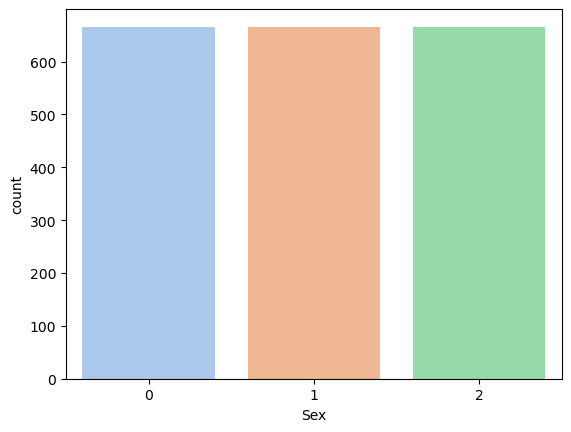

In [19]:
#Count plot for Sex
sns.countplot(x='Sex', data=df_Est_Mgt, palette='pastel')


(array([333., 333., 333., 333., 666.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

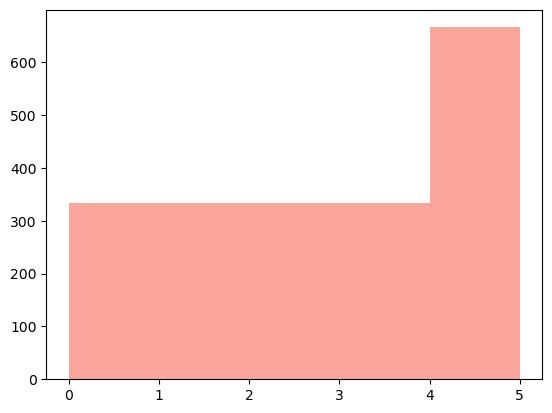

In [23]:
#Histplot for Age Group
plt.hist(df_Est_Mgt['Age Group'], bins=5, color='salmon', alpha=0.7)


Text(0, 0.5, 'Count')

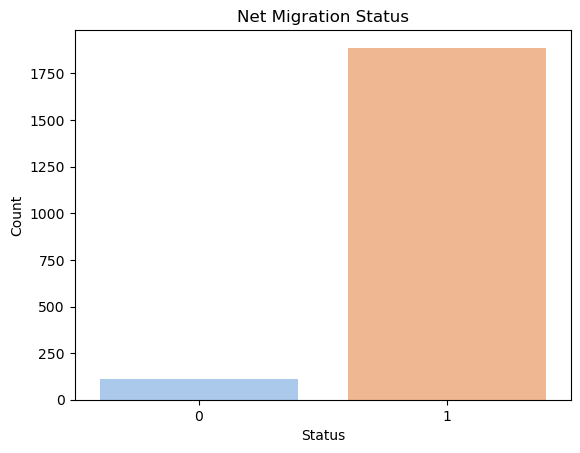

In [11]:
# Bar plot for 'Net Migration Status'
sns.countplot(x='Net Migration Status', data=df_Est_Mgt, palette='pastel')
plt.title('Net Migration Status')
plt.xlabel('Status')
plt.ylabel('Count')





Text(0, 0.5, 'Value')

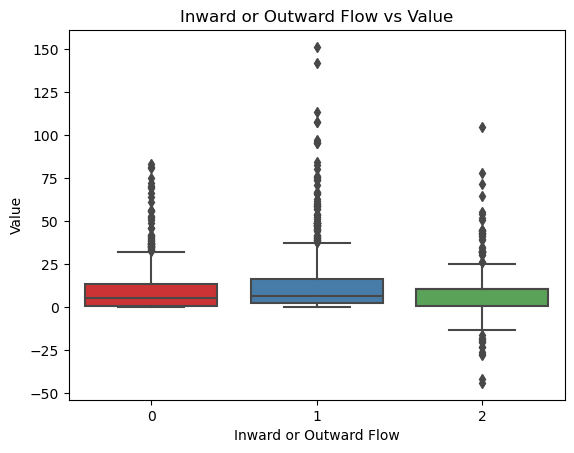

In [13]:
# Box plot for 'Inward or Outward Flow' vs 'VALUE'
sns.boxplot(x='Inward or Outward Flow', y='VALUE', data=df_Est_Mgt, palette='Set1')
plt.title('Inward or Outward Flow vs Value')
plt.xlabel('Inward or Outward Flow')
plt.ylabel('Value')